In [ ]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from google.colab import drive
drive.mount('/content/drive')

arquivo_base_dados = "/content/drive/MyDrive/diabetes_prediction_dataset.csv"

data = pd.read_csv(arquivo_base_dados)

In [ ]:
# Balanciamento dos dados

# Contagem de exemplos em cada classe
contagem_classes = data['diabetes'].value_counts()

# Determinar o número mínimo de exemplos em uma classe
min_contagem = contagem_classes.min()

# Mostrar aleatoriamente exemplos de cada classe
dados_balanceados = pd.concat([
    data[data['diabetes'] == classe].sample(min_contagem, replace=True)
    for classe in contagem_classes.index], ignore_index=True)

In [ ]:
# Descrição inicial do conjunto de dados

data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
# Usando o método info() para obter informações sobre o DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
#Tratamento de dados ausentes/ruidosos

data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
# Remoção de linhas onde o gênero é listado como 'Other'

data = data[data['gender'] != 'Other']

In [ ]:
# Remover registros onde a idade é igual a 0
data = data[data['age'] != 0]

# Verificar a nova forma do DataFrame
print(data.shape)

(99982, 9)


In [ ]:
# Lista das colunas numéricas
colunas_numericas = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

In [ ]:
# Verificando duplicatas com base na coluna 'diabetes'
duplicatas_por_classe = data[data.duplicated(subset=['diabetes'])]
duplicatas_por_classe

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [ ]:
# Tratamento de duplicatas

linhas_duplicadas = data[data.duplicated()]
print("Número de linhas duplicadas: ", linhas_duplicadas.shape)

Número de linhas duplicadas:  (3854, 9)


In [ ]:
# Remoção de linhas duplicatas

data = data.drop_duplicates()

In [ ]:
# Usando o método astype() para conversão de variáveis float para inteiro
data[colunas_numericas] = data[colunas_numericas].astype(int)

In [ ]:
# Estatísticas descritivas básicas depois da remoção de duplicatas

df_numericas = data[colunas_numericas]

# Resumo de estatística descritiva para colunas numéricas
df_numericas.describe().style.format("{:.2f}")

,age,bmi,HbA1c_level,blood_glucose_level
count,81582.00,81582.00,81582.00,81582.00
mean,43.51,27.39,5.11,139.12
std,21.69,6.91,1.14,41.83
min,1.00,10.00,3.00,80.00
25%,26.00,23.00,4.00,100.00
50%,45.00,27.00,5.00,140.00
75%,61.00,30.00,6.00,159.00
max,80.00,95.00,9.00,300.00


In [ ]:
# Calcula à média para cada coluna numérica
media = data[colunas_numericas].mean()
print("Média:\n", media)

Média:
 age                     43.512662
bmi                     27.385661
HbA1c_level              5.110306
blood_glucose_level    139.118335
dtype: float64


In [ ]:
# Calcula à mediana para cada coluna numérica
mediana = data[colunas_numericas].median()
print("Mediana:\n", mediana)

Mediana:
 age                     45.0
bmi                     27.0
HbA1c_level              5.0
blood_glucose_level    140.0
dtype: float64


In [ ]:
# Calcula o desvio padrão para cada coluna numérica
desvio_padrao = data[colunas_numericas].std()
print("Desvio Padrão:\n", desvio_padrao)

Desvio Padrão:
 age                    21.690313
bmi                     6.907634
HbA1c_level             1.136628
blood_glucose_level    41.827569
dtype: float64


In [ ]:
# Calcula o mínimo para cada coluna numérica
minimo = data[colunas_numericas].min()
print("Mínimo:\n", minimo)

Mínimo:
 age                     1
bmi                    10
HbA1c_level             3
blood_glucose_level    80
dtype: int64


In [ ]:
# Calcula o máximo para cada coluna numérica
maximo = data[colunas_numericas].max()
print("Máximo:\n", maximo)

Máximo:
 age                     80
bmi                     95
HbA1c_level              9
blood_glucose_level    300
dtype: int64


In [ ]:
# Calcula os quartis (25º, 50º e 75º percentis) para cada coluna numérica
quartis = data[colunas_numericas].quantile([0.25, 0.5, 0.75])
print("Quartis:\n", quartis)

Quartis:
        age   bmi  HbA1c_level  blood_glucose_level
0.25  26.0  23.0          4.0                100.0
0.50  45.0  27.0          5.0                140.0
0.75  61.0  30.0          6.0                159.0


In [ ]:
# Lista das colunas categóricas
colunas_categoricas = ['gender', 'smoking_history', 'hypertension', 'heart_disease', 'diabetes']

In [ ]:
# Iterarando sobre as colunas categóricas
for coluna in colunas_categoricas:
    # Calculando a contagem de frequências para a coluna atual
    frequencia = data[coluna].value_counts().reset_index(name='Frequência')

    # Imprimindo os resultados
    print(f"Frequência para a variável categórica '{coluna}':\n", frequencia)
    print("\n" + "="*50 + "\n")  # Apenas para separar os resultados das diferentes colunas

Frequência para a variável categórica 'gender':
     index  Frequência
0  Female       56161
1    Male       39967


Frequência para a variável categórica 'smoking_history':
          index  Frequência
0        never       34395
1      No Info       32881
2       former        9299
3      current        9197
4  not current        6359
5         ever        3997


Frequência para a variável categórica 'hypertension':
    index  Frequência
0      0       88667
1      1        7461


Frequência para a variável categórica 'heart_disease':
    index  Frequência
0      0       92205
1      1        3923


Frequência para a variável categórica 'diabetes':
    index  Frequência
0      0       87646
1      1        8482




In [ ]:
# Moda para variáveis categóricas
moda = data[colunas_categoricas].mode()
print("Moda para as variáveis categóricas:\n", moda)

Moda para as variáveis categóricas:
    gender smoking_history  hypertension  heart_disease  diabetes
0  Female           never             0              0         0


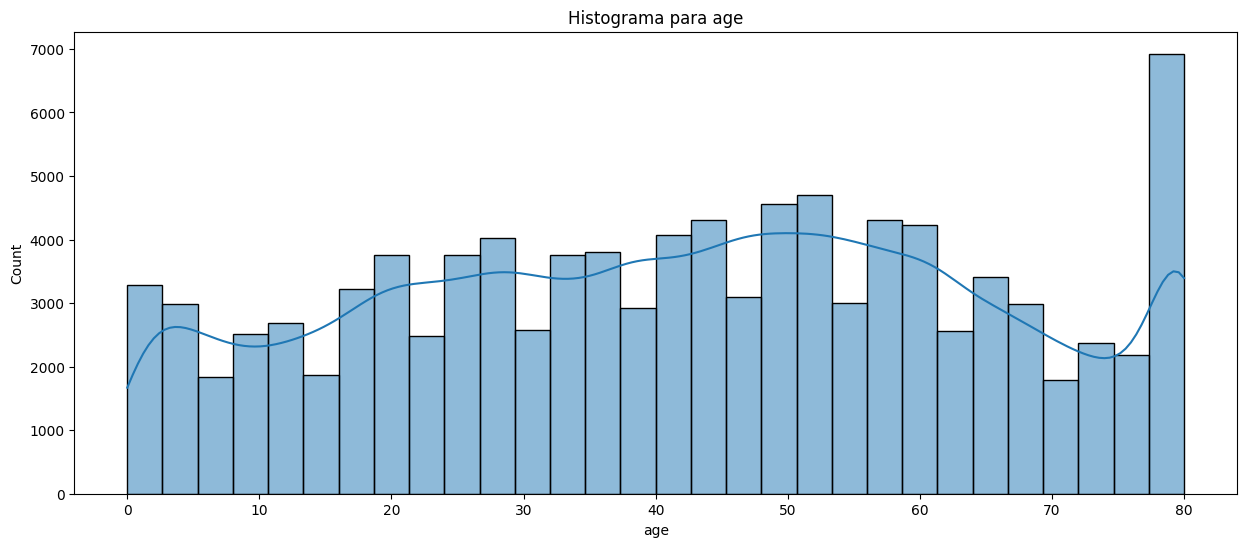

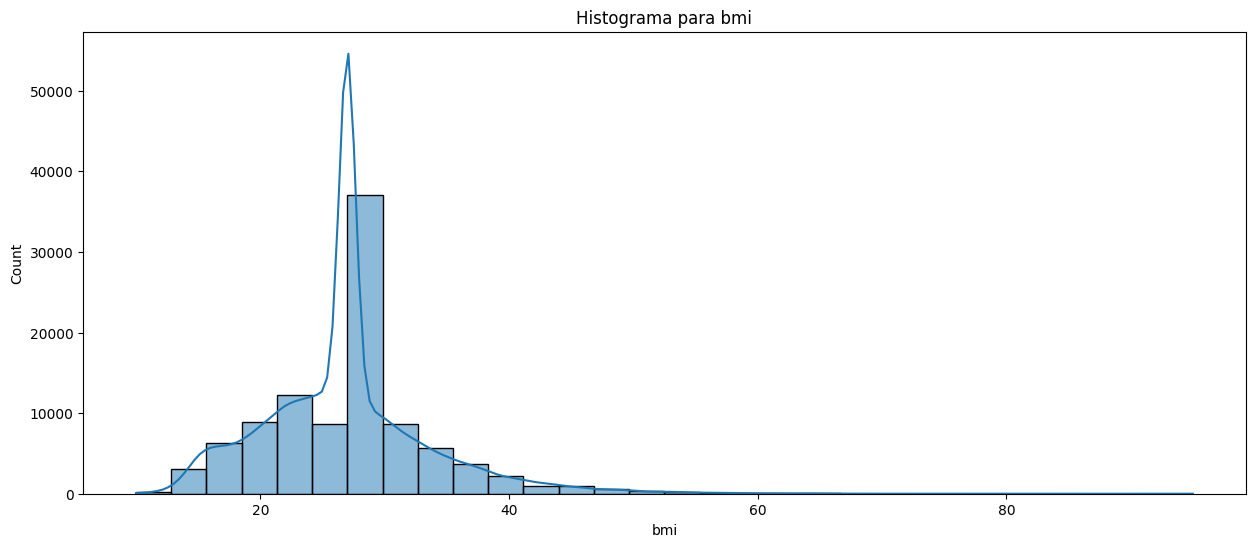

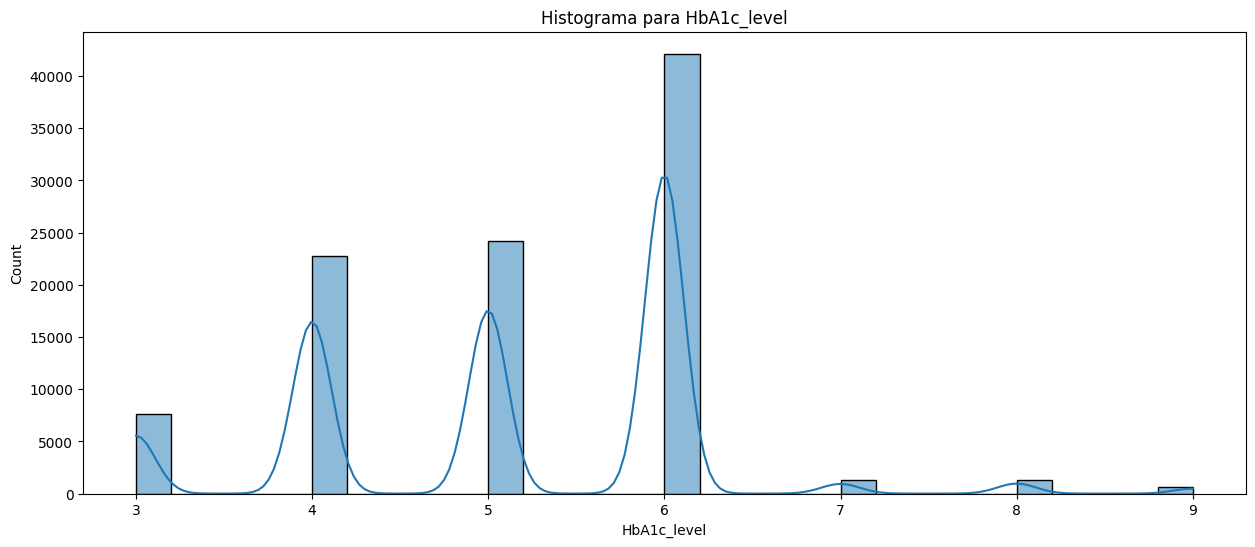

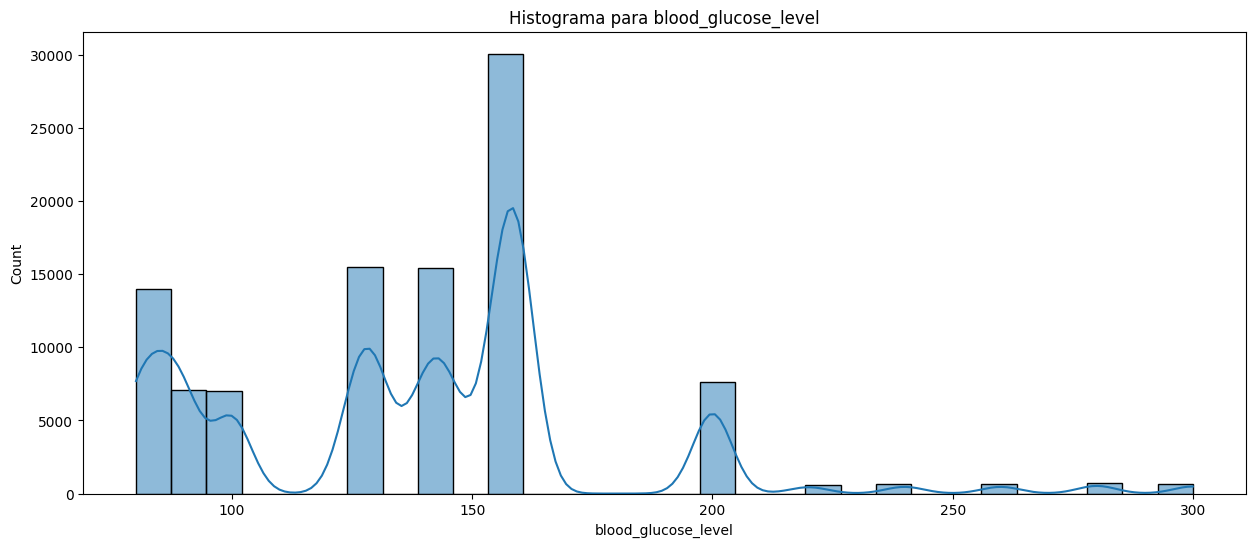

In [ ]:
#Marianne - Visualização de dados:

#Histograma:

for coluna in colunas_numericas:
    plt.figure(figsize=(15, 6))
    sns.histplot(data[coluna], bins=30, kde=True)
    plt.title(f'Histograma para {coluna}')
    plt.show()

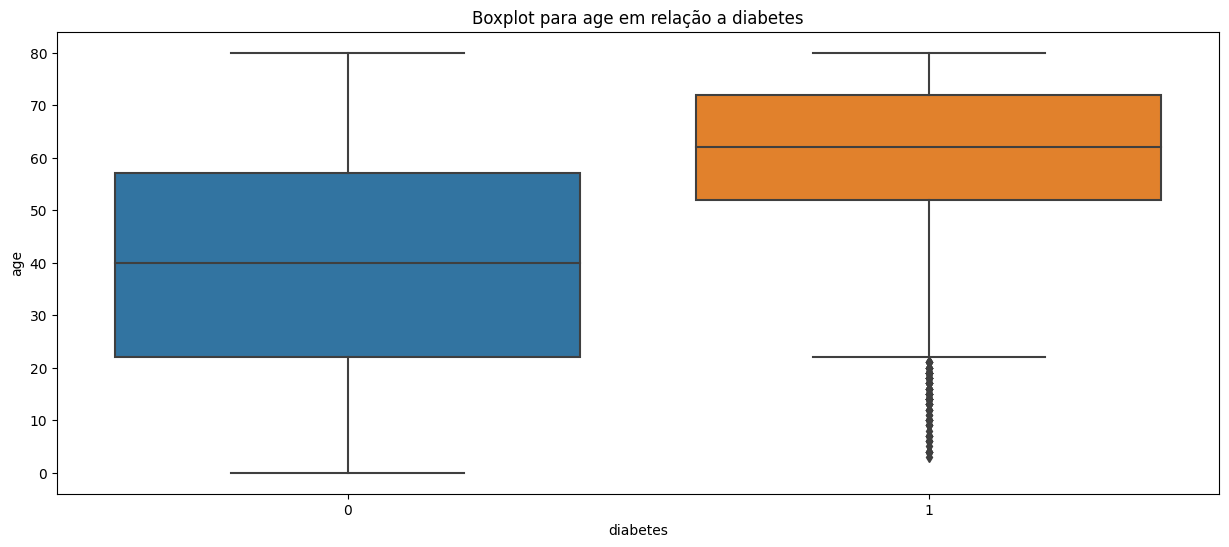

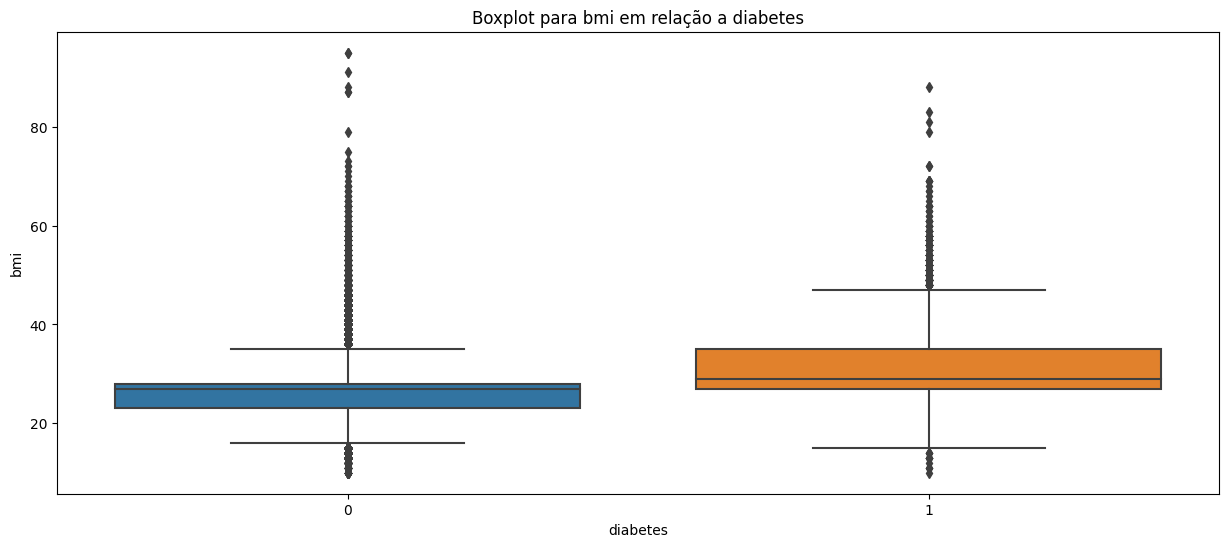

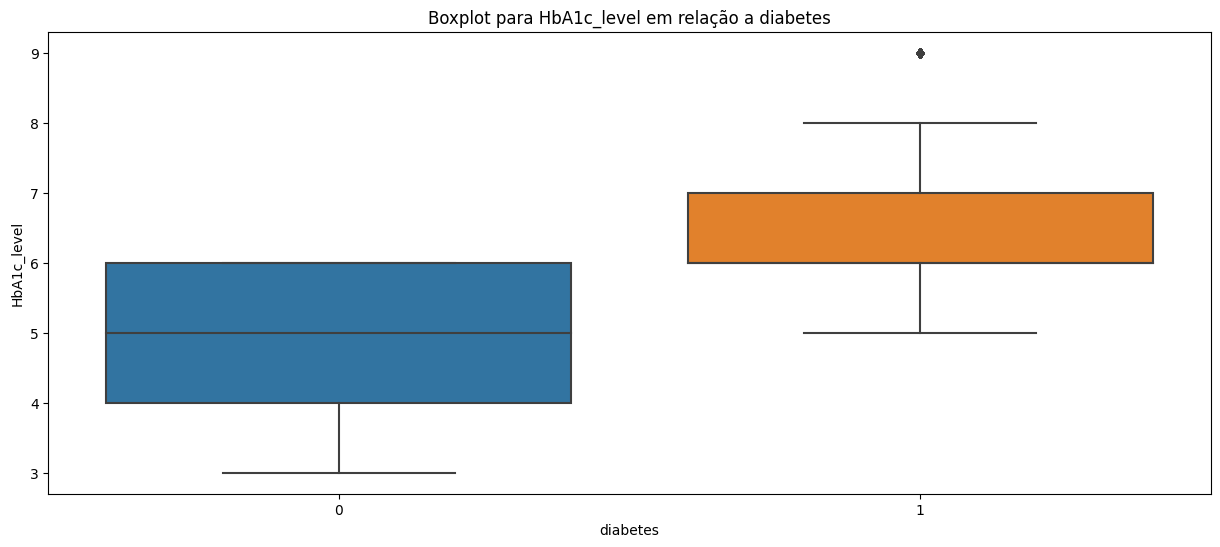

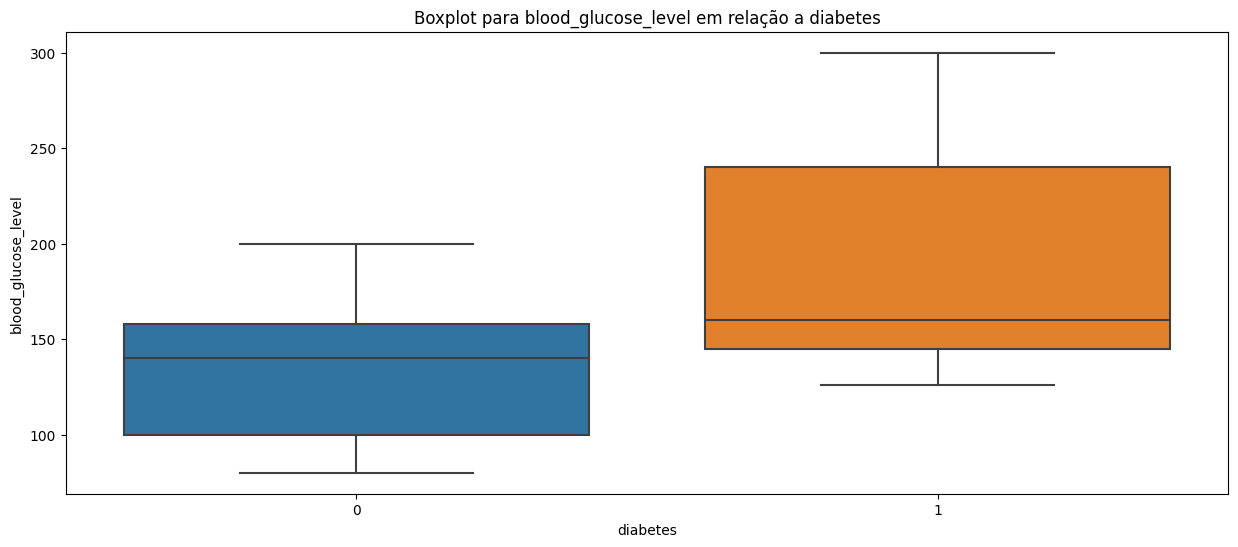

In [ ]:
# Boxplot para colunas numéricas em relação a diabetes

for coluna in colunas_numericas:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x='diabetes', y=coluna, data=data)
    plt.title(f'Boxplot para {coluna} em relação a diabetes')
    plt.show()

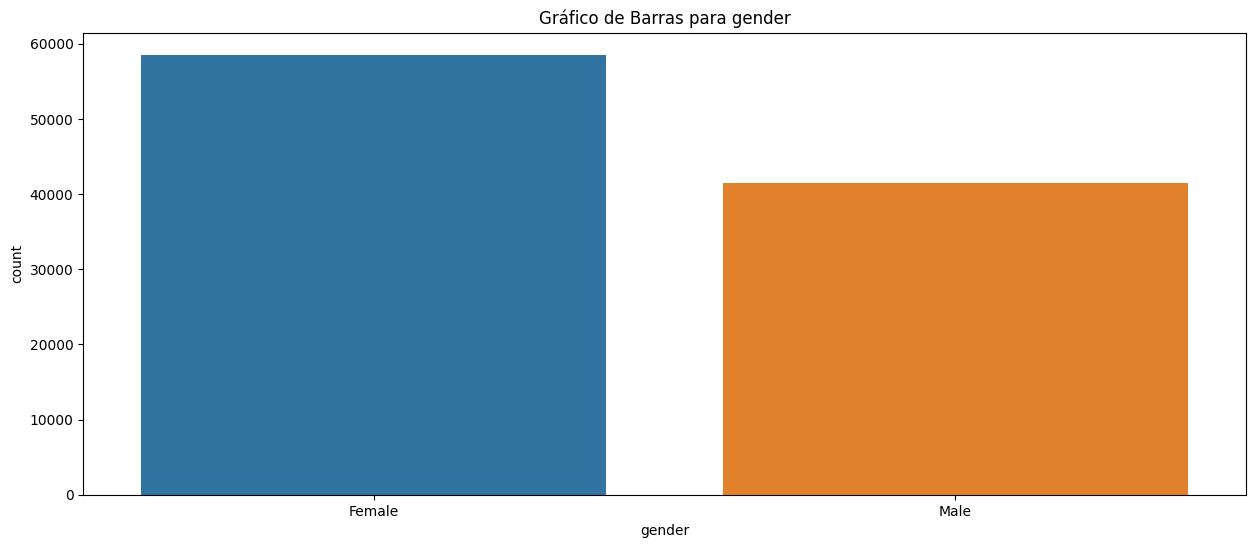

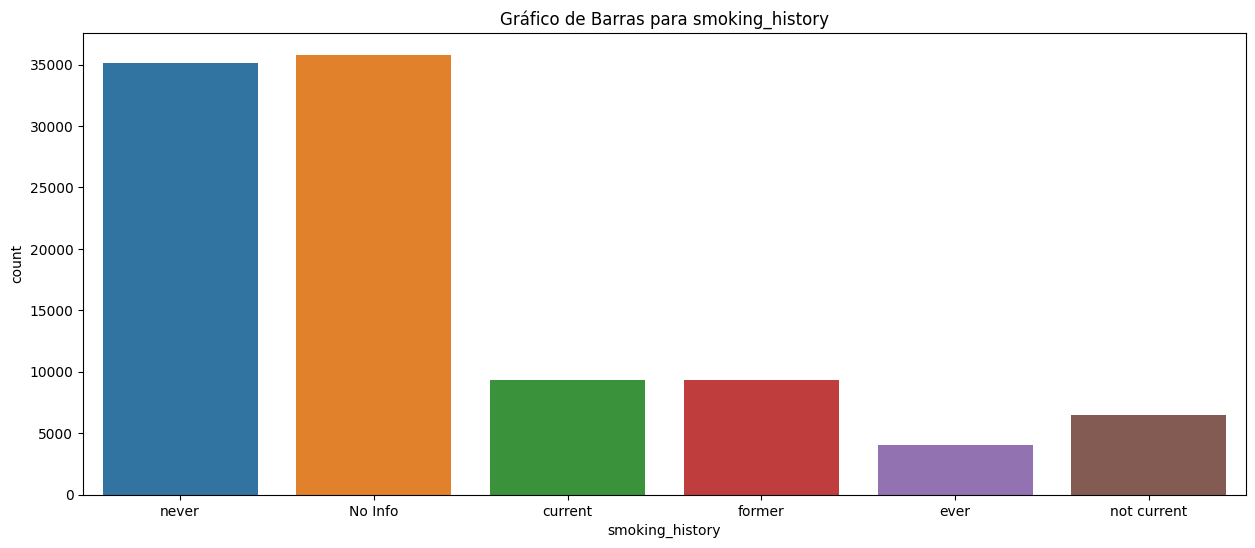

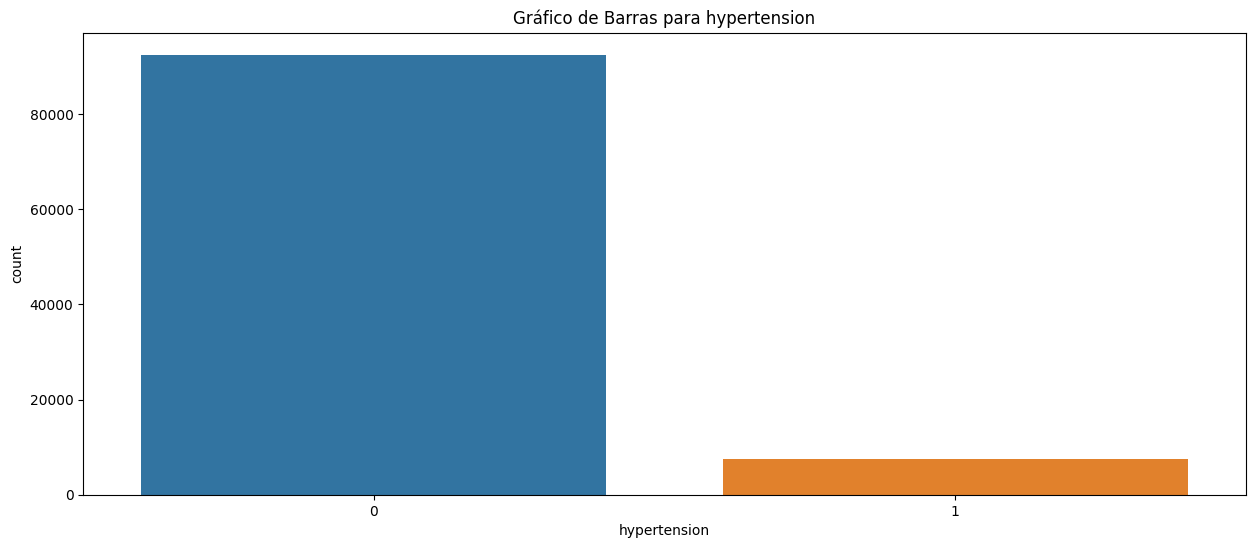

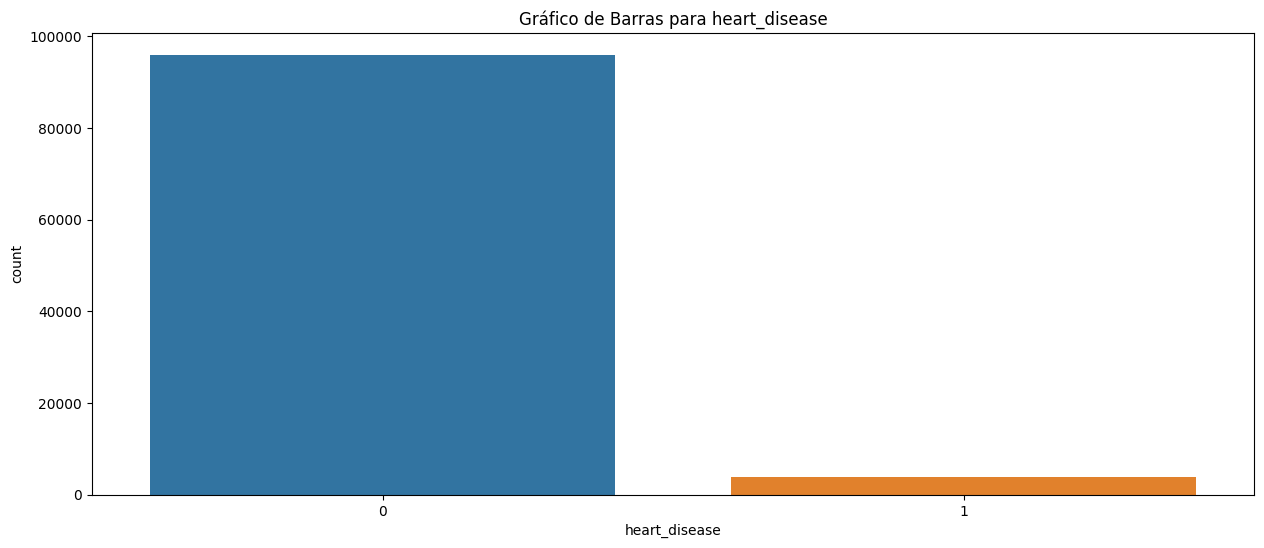

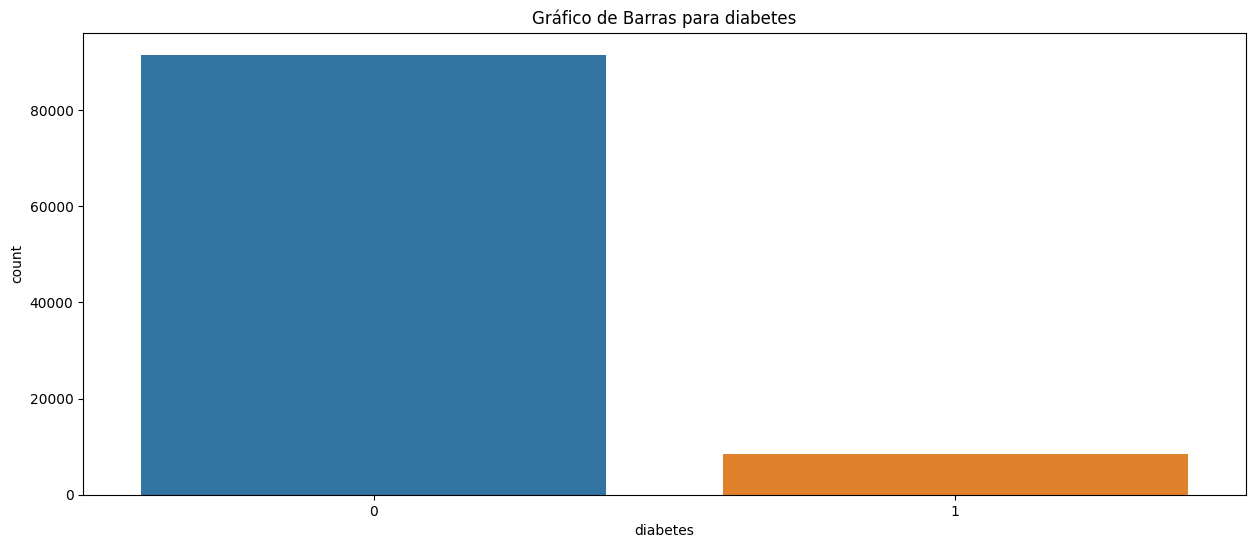

In [ ]:
# Gráfico de barras para colunas categóricas

for coluna in colunas_categoricas:
    plt.figure(figsize=(15, 6))
    sns.countplot(data=data, x=coluna)
    plt.title(f'Gráfico de Barras para {coluna}')
    plt.show()

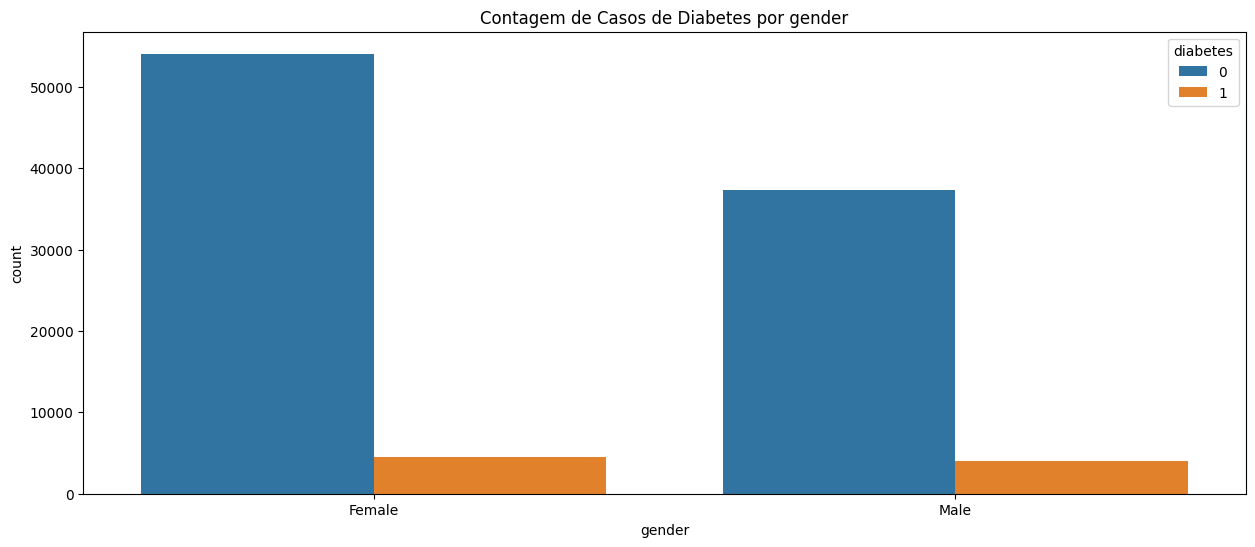

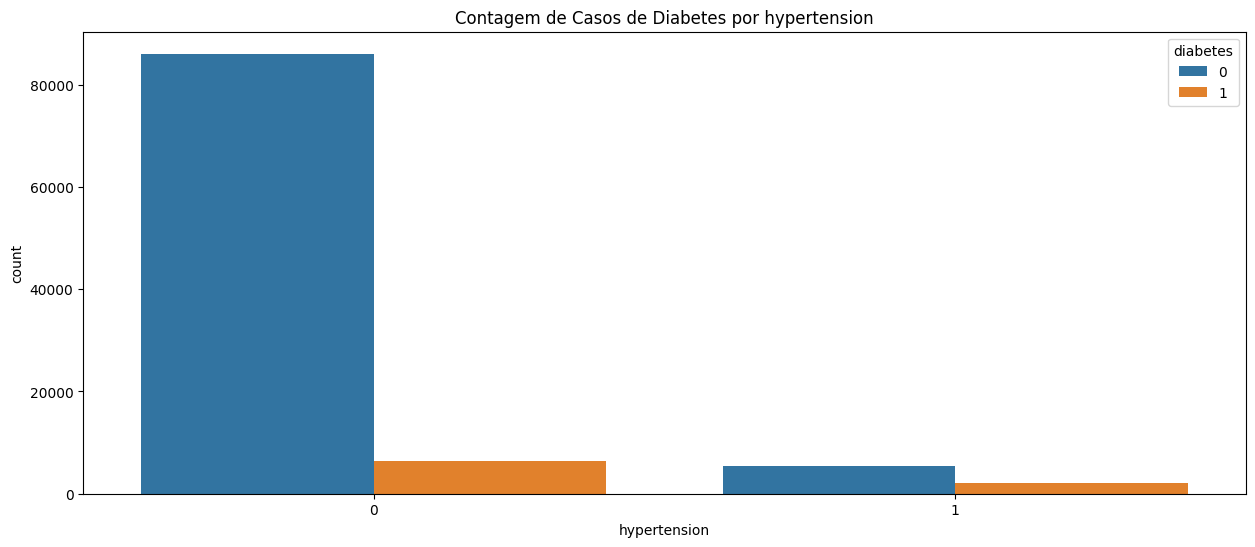

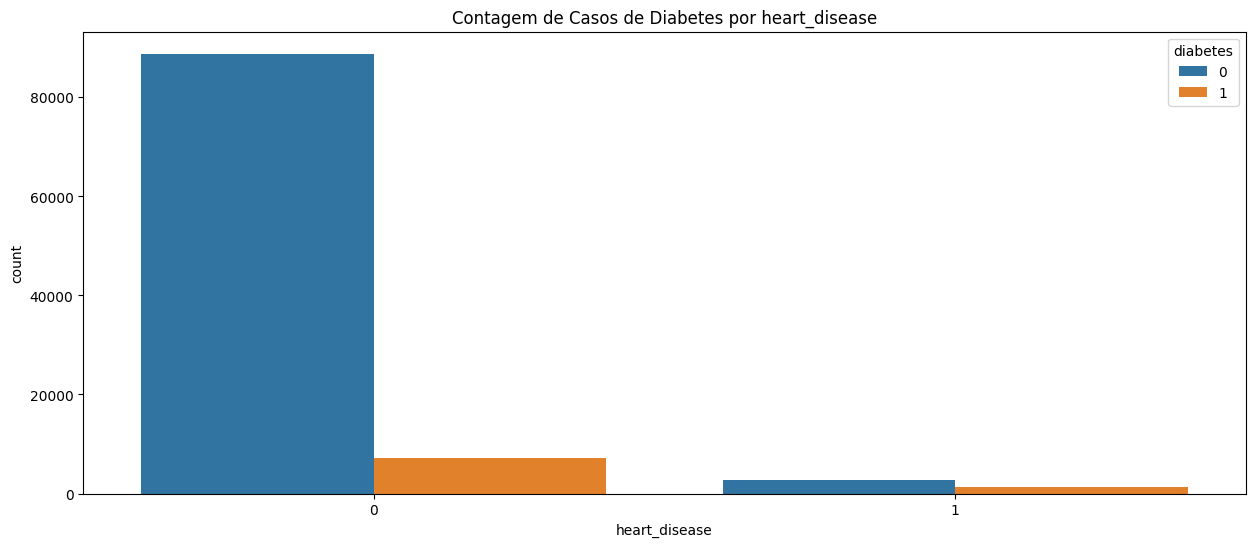

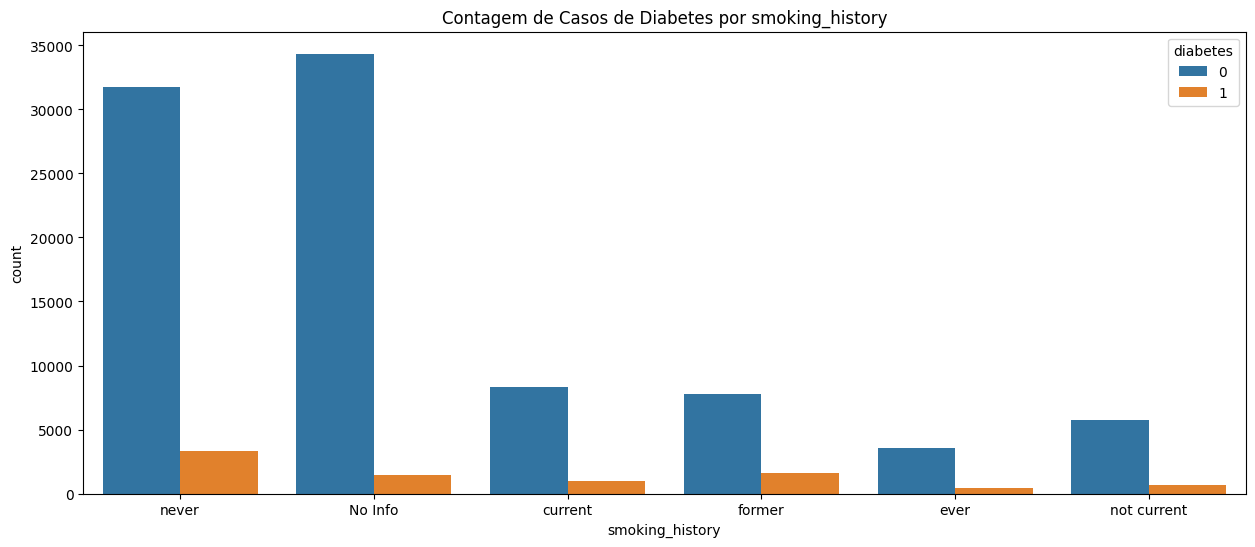

In [ ]:
# Contagem de Casos de Diabetes por Gênero, Hipertensão, Doença Cardíaca e Histórico de Tabagismo

dados = ['gender', 'hypertension', 'heart_disease', 'smoking_history']

for coluna in dados:
    plt.figure(figsize=(15, 6))
    sns.countplot(data=data, x=coluna, hue='diabetes')
    plt.title(f'Contagem de Casos de Diabetes por {coluna}')
    plt.show()

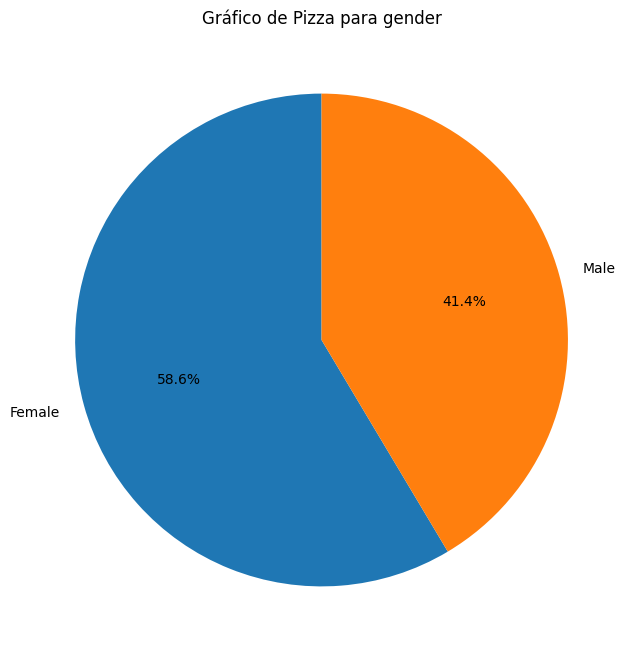

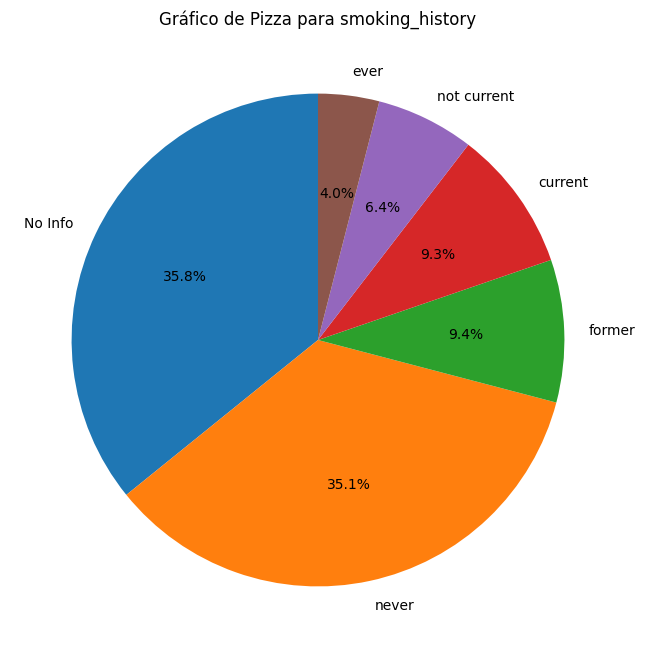

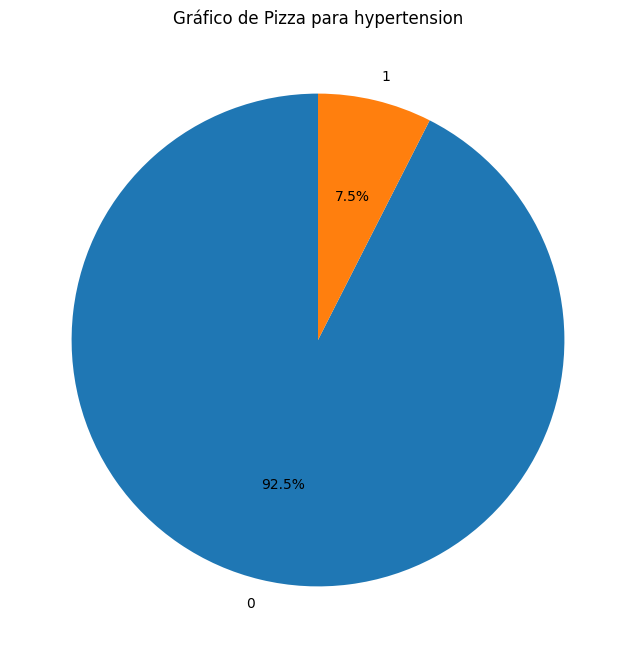

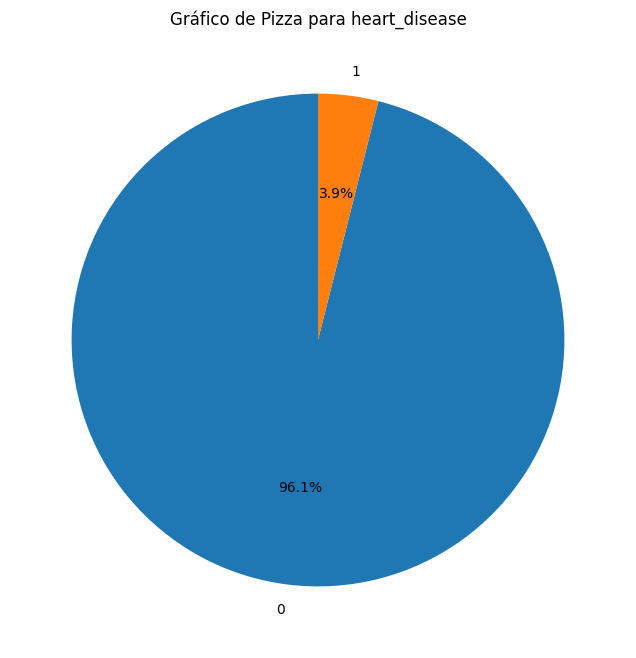

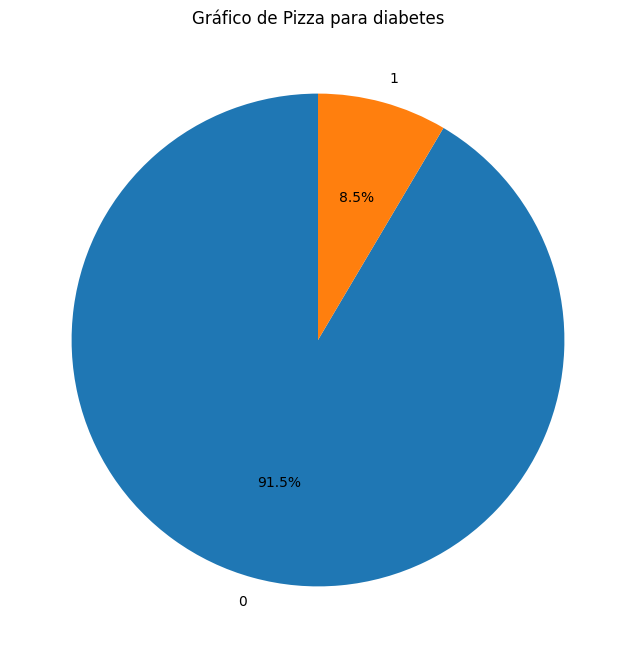

In [ ]:
# Gráfico de Pizza:

for coluna in colunas_categoricas:
    plt.figure(figsize=(8, 8))
    contagem_categorias = data[coluna].value_counts()
    plt.pie(contagem_categorias, labels=contagem_categorias.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Gráfico de Pizza para {coluna}')
    plt.show()

In [ ]:
# Marianne - Análise de Correlação

# Tabelas de Contigência Para Variáveis Categóricas (Gênero):

tabela_genero_diabetes = pd.crosstab(data['gender'], data['diabetes'])
print(tabela_genero_diabetes)

diabetes      0     1
gender               
Female    54091  4461
Male      37391  4039


In [ ]:
# Marianne - Análise de Correlação

# Tabelas de Contigência Para Variáveis Categóricas (Histórico com tabagismo):

tabela_historico_tabagismo_diabetes = pd.crosstab(data['smoking_history'], data['diabetes'])
print(tabela_historico_tabagismo_diabetes)

diabetes             0     1
smoking_history             
No Info          34356  1454
current           8338   948
ever              3531   472
former            7762  1590
never            31746  3346
not current       5749   690


In [ ]:
# Marianne - Análise de Correlação

#Tabelas de Contigência Para Variáveis Categóricas (hipertensão):

tabela_hipertensão_diabetes = pd.crosstab(data['hypertension'], data['diabetes'])
print(tabela_hipertensão_diabetes)

diabetes          0     1
hypertension             
0             86085  6412
1              5397  2088


In [ ]:
# Marianne - Análise de Correlação

# Tabelas de Contigência Para Variáveis Categóricas (Doença Cardíaca):

tabela_doenca_cardiaca_diabetes = pd.crosstab(data['heart_disease'], data['diabetes'])
print(tabela_doenca_cardiaca_diabetes)

diabetes           0     1
heart_disease             
0              88807  7233
1               2675  1267


In [ ]:
# Análise de Correlação - Correlações entre variáveis numéricas

correlacao = data[colunas_numericas].corr(method='pearson')
print(correlacao)

                          age       bmi  HbA1c_level  blood_glucose_level
age                  1.000000  0.337378     0.101343             0.110679
bmi                  0.337378  1.000000     0.083017             0.091310
HbA1c_level          0.101343  0.083017     1.000000             0.166831
blood_glucose_level  0.110679  0.091310     0.166831             1.000000


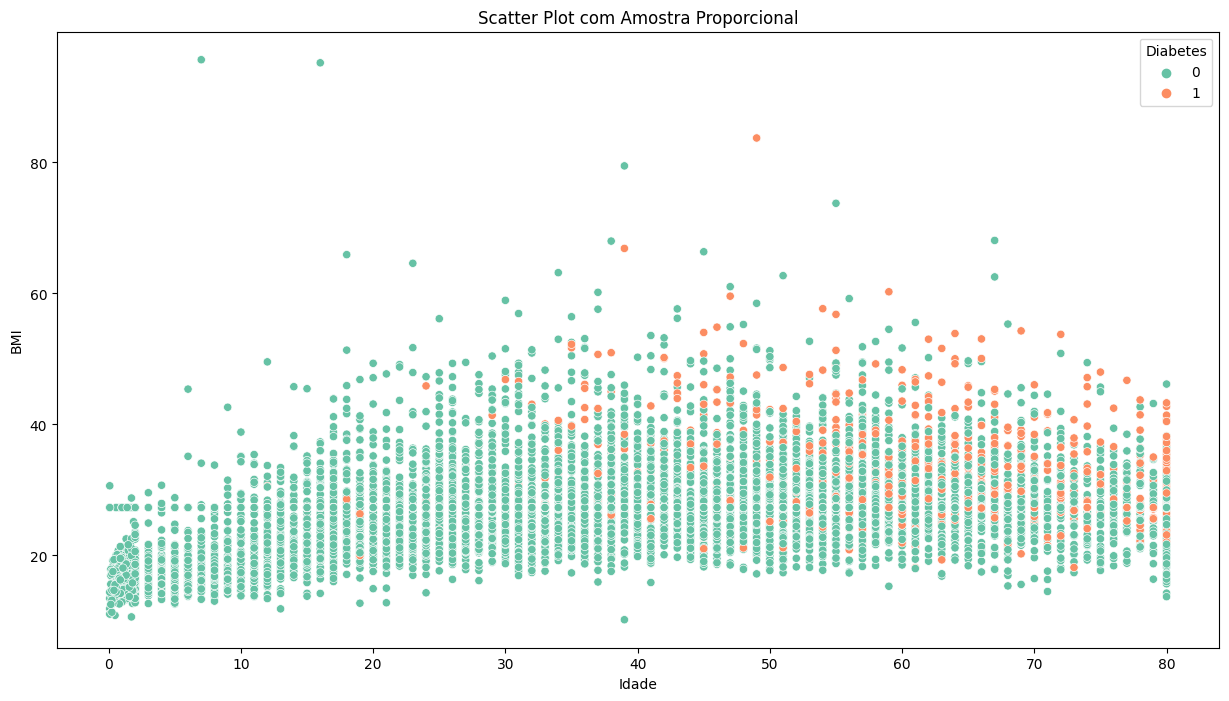

In [ ]:
# Exploração de Relações e Tendências com o gráfico de dispersão scartter plot

# Criando uma amostra proporcional de 10% dos dados
amostra_proporcional = data.sample(frac=0.1, random_state=42)

# Configurando o layout do gráfico
plt.figure(figsize=(15, 8))

# Criando o scatter plot
sns.scatterplot(x='age', y='bmi', hue='diabetes', data=amostra_proporcional, palette='Set2')

# Adicionando rótulos e título
plt.xlabel('Idade')
plt.ylabel('BMI')
plt.title('Scatter Plot com Amostra Proporcional')

# Exibindo a legenda
plt.legend(title='Diabetes', loc='upper right')

# Exibindo o gráfico
plt.show()

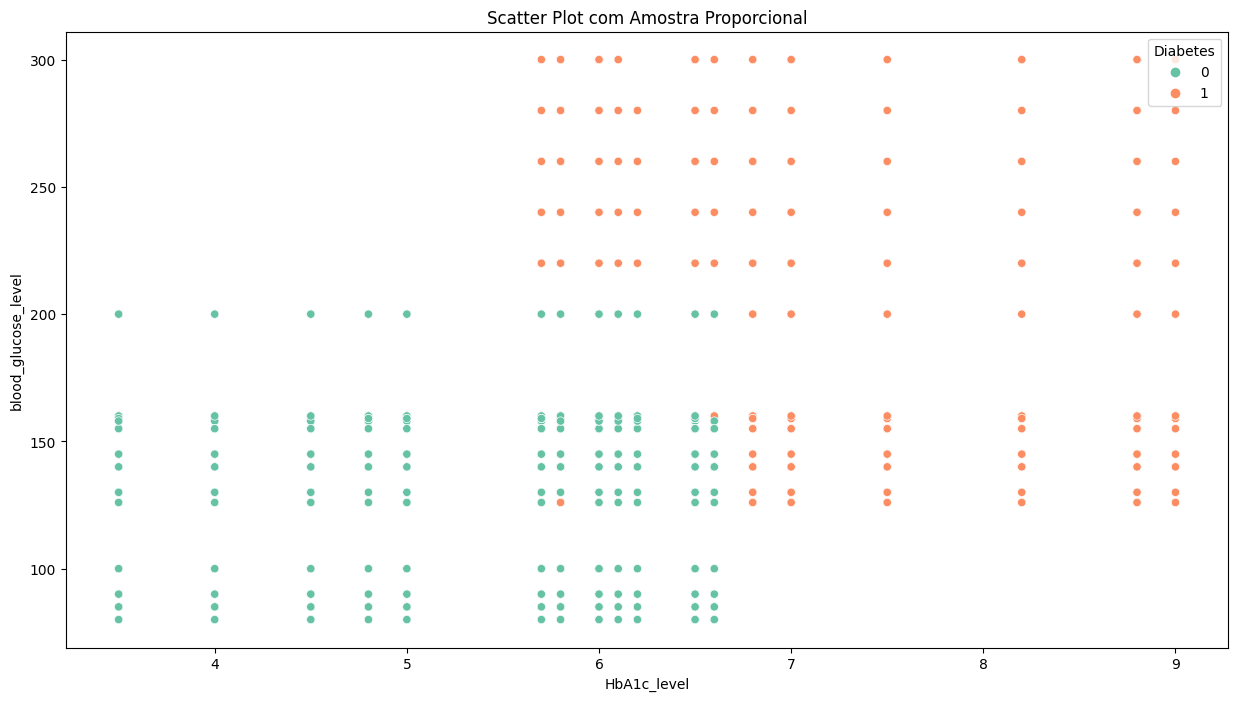

In [ ]:
# Criando uma amostra proporcional de 10% dos dados
amostra_proporcional = data.sample(frac=0.1, random_state=42)

# Configurando o layout do gráfico
plt.figure(figsize=(15, 8))

# Criando o scatter plot
sns.scatterplot(x='HbA1c_level', y='blood_glucose_level', hue='diabetes', data=amostra_proporcional, palette='Set2')

# Adicionando rótulos e título
plt.xlabel('HbA1c_level')
plt.ylabel('blood_glucose_level')
plt.title('Scatter Plot com Amostra Proporcional')

# Exibindo a legenda
plt.legend(title='Diabetes', loc='upper right')

# Exibindo o gráfico
plt.show()

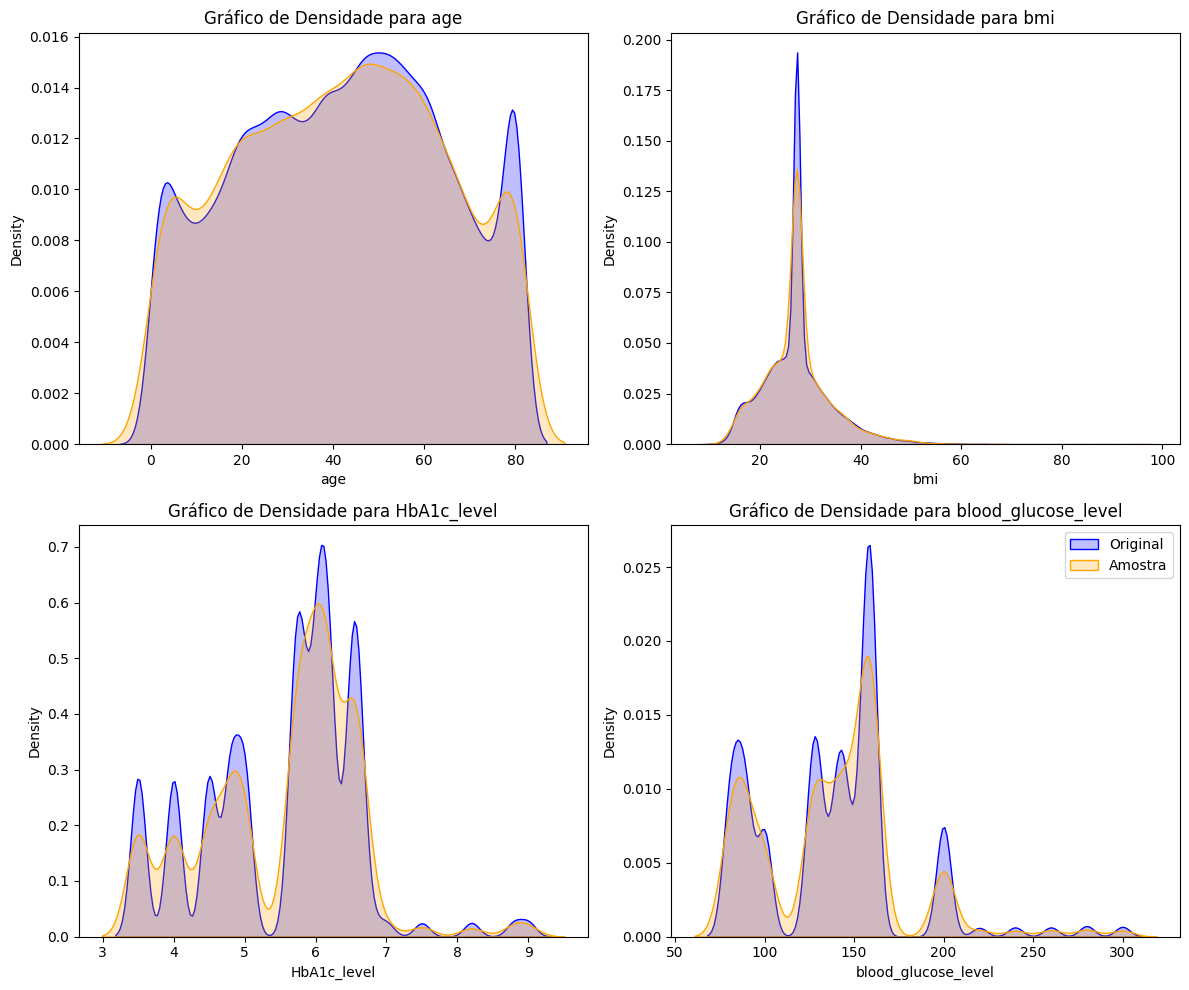

In [ ]:
# Criando uma amostra proporcional de 10% dos dados
amostra_proporcional = data.sample(frac=0.1, random_state=42)

# Configurando o layout do gráfico
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Criando subplots para cada coluna numérica
for i, coluna in enumerate(colunas_numericas):
    row = i // 2
    col = i % 2
    sns.kdeplot(data[coluna], fill=True, ax=axs[row, col], label='Original', color='blue')
    sns.kdeplot(amostra_proporcional[coluna], fill=True, ax=axs[row, col], label='Amostra', color='orange')
    axs[row, col].set_title(f'Gráfico de Densidade para {coluna}')

# Adicionando uma legenda
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-50-9a4e5640af6e>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=data.corr(method='pearson'),


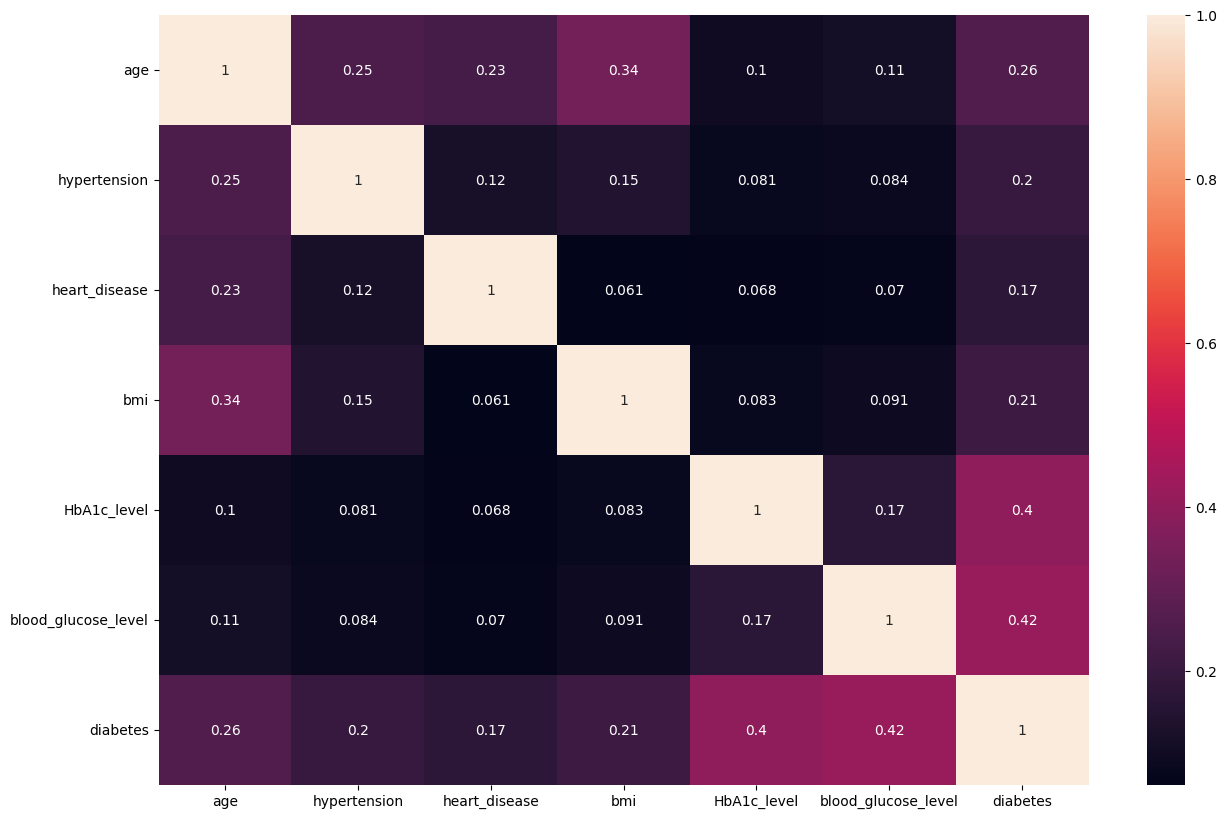

In [ ]:
# Exploração de Relações e Tendências com gráfico heatmap

plt.figure(figsize=(15, 10))
sns.heatmap(data=data.corr(method='pearson'),
            annot = True);

plt.show()

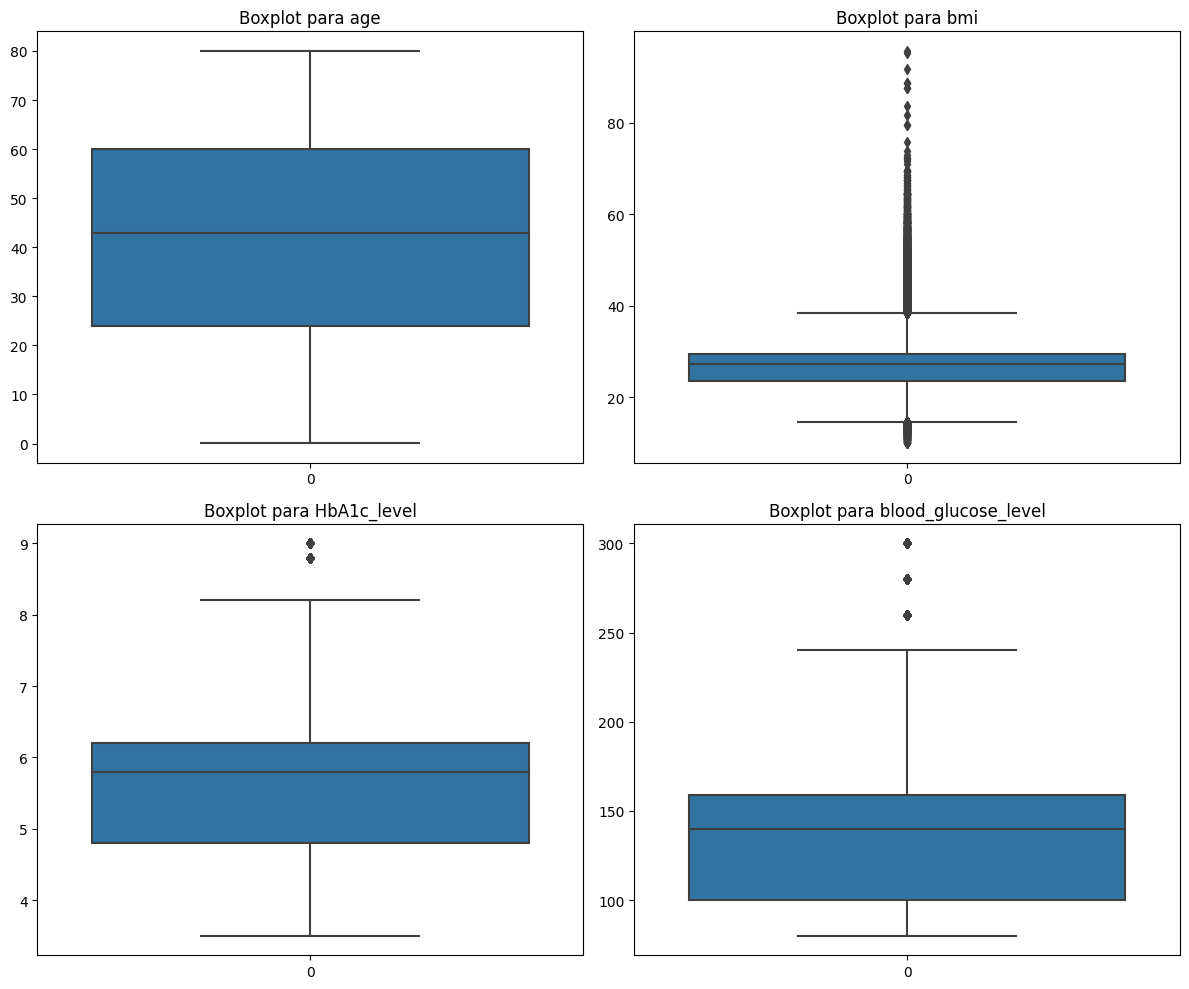

In [ ]:
# Detecção de Outliers nas variáveis numéricas

dados_numericos = data[colunas_numericas]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

for i, coluna in enumerate(colunas_numericas):
    row = i // 2
    col = i % 2
    sns.boxplot(data=dados_numericos[coluna], ax=axs[row, col])
    axs[row, col].set_title(f'Boxplot para {coluna}')

plt.tight_layout()
plt.show()

In [ ]:
# Modelo de IA

# Importação
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Importação das bibliotecas para lidar com desequilíbrio de classes
from imblearn.pipeline import Pipeline as imbPipeline

# Função para remoção de outliers usando Z-score
from scipy import stats

In [ ]:
# Remoção de outliers
def remove_outliers_zscore(data, threshold=3):
    z_scores = stats.zscore(data)
    abs_z_scores = abs(z_scores)
    filtered_entries = (abs_z_scores < threshold).all(axis=1)
    return data[filtered_entries]

In [ ]:
# Definindo o pré-processador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']),
    ])

# Definindo os dados de treinamento
X = dados_balanceados[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
y = dados_balanceados['diabetes']

# Definindo o classificador (Random Forest Classifier)
classifier = RandomForestClassifier()

In [ ]:
# Criando um pipeline com técnicas de subamostragem e sobreamostragem
classifier = imbPipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', RandomForestClassifier())])

In [ ]:
# Definindo o grid de parâmetros para otimização
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Criando o objeto Grid Search
grid_search = GridSearchCV(classifier, param_grid, cv=5)

In [ ]:
# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo
grid_search.fit(X_train, y_train)

# Imprimindo os melhores parâmetros
print("Melhores Parâmetros: ", grid_search.best_params_)

Melhores Parâmetros:  {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}


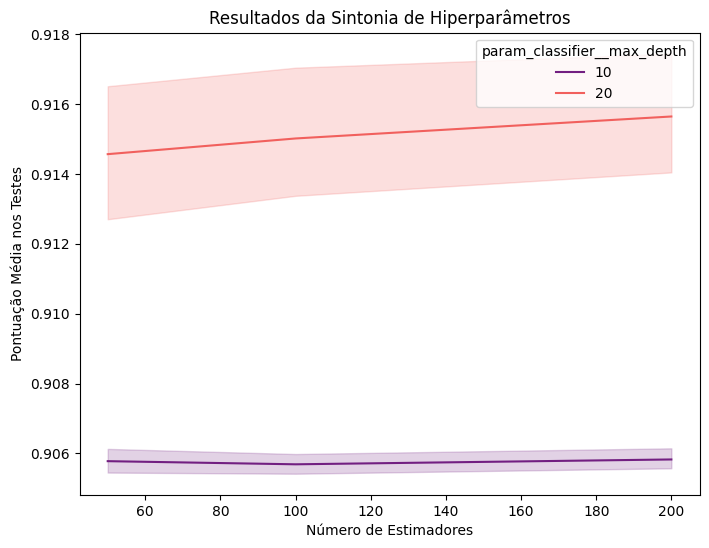

In [ ]:
# Criando um DataFrame com os resultados da pesquisa em grade
resultados_data = pd.DataFrame(grid_search.cv_results_)

# Definindo o tamanho da figura
plt.figure(figsize=(8, 6))

# Criando um gráfico de linha usando os dados do DataFrame
sns.lineplot(data=resultados_data, x='param_classifier__n_estimators', y='mean_test_score', hue='param_classifier__max_depth', palette='magma')

# Definindo o título do gráfico
plt.title('Resultados da Sintonia de Hiperparâmetros')

# Definindo rótulos para os eixos x e y
plt.xlabel('Número de Estimadores')
plt.ylabel('Pontuação Média nos Testes')

# Mostrando o gráfico
plt.show()

In [ ]:
# Fazendo previsões com conjunto de teste
y_pred = grid_search.predict(X_test)

# Avaliando o modelo
print("Acurácia do Modelo: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Acurácia do Modelo:  0.9326470588235294
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1687
           1       0.92      0.95      0.93      1713

    accuracy                           0.93      3400
   macro avg       0.93      0.93      0.93      3400
weighted avg       0.93      0.93      0.93      3400



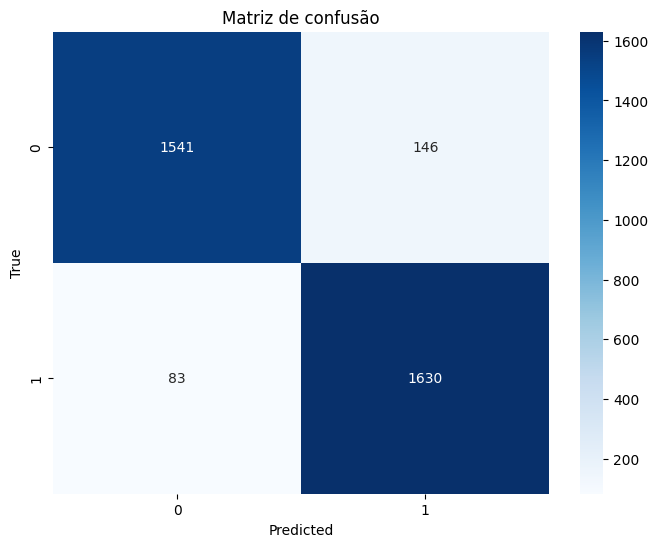

In [ ]:
# Matriz de confusão

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de confusão')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

        Característica  Importância
2          HbA1c_level     0.395487
3  blood_glucose_level     0.289777
0                  age     0.184392
1                  bmi     0.130344


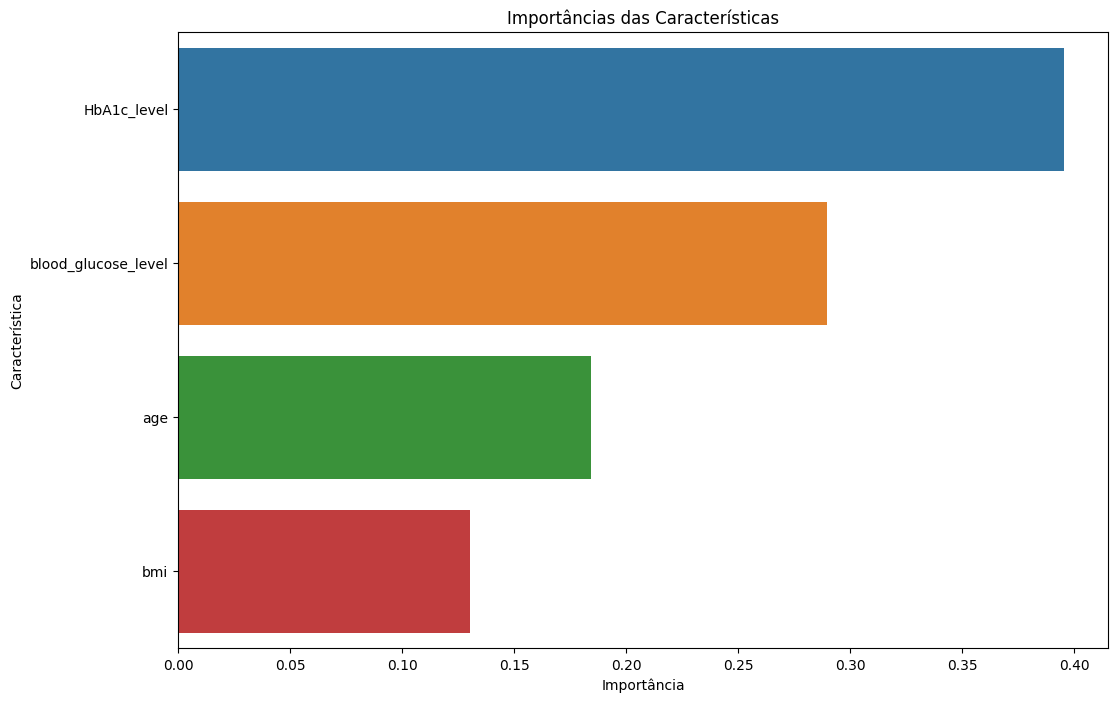

In [ ]:
# Obtendo as colunas após o pré-processamento
colunas_preprocessadas = grid_search.best_estimator_.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(input_features=['age', 'bmi', 'HbA1c_level', 'blood_glucose_level'])

# Adicionando os nomes das características numéricas
nomes_caracteristicas = colunas_preprocessadas

# Obtendo as importâncias das características
importancias = grid_search.best_estimator_.named_steps['classifier'].feature_importances_

# Criando um dataframe para as importâncias das características
df_importancia = pd.DataFrame({'Característica': nomes_caracteristicas, 'Importância': importancias})

# Classificando o dataframe por importância
df_importancia = df_importancia.sort_values('Importância', ascending=False)

# Imprimindo as importâncias das características
print(df_importancia)

# Plotando as importâncias das características
plt.figure(figsize=(12, 8))
sns.barplot(x='Importância', y='Característica', data=df_importancia)
plt.title('Importâncias das Características')
plt.show()

In [ ]:
# Defina o número de vezes que você deseja rodar o modelo
num_execucoes = 30

# Lista para armazenar os resultados de cada execução
resultados = []

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for _ in range(num_execucoes):
    # Criando e treinando o modelo
    modelo = RandomForestClassifier()
    modelo.fit(X_train, y_train)

    # Fazendo previsões no conjunto de teste
    y_pred = modelo.predict(X_test)

    # Avaliando a acurácia e armazenando o resultado
    acuracia = accuracy_score(y_test, y_pred)
    resultados.append(acuracia)

# Calculando a média dos resultados
media_acuracia = np.mean(resultados)

# Imprimindo os resultados
print(f"Acurácia Média ao longo de {num_execucoes} execuções: {media_acuracia}")


Acurácia Média ao longo de 30 execuções: 0.9312058823529412
